In [ ]:
# import our packages

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# read the data

In [5]:
vdf=pd.read_csv('Visadataset - Visadataset.csv')
vdf

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


**CATEGORICAL VS CATEGORICAL**

- as we know that the count of asia is==16861
- in that how many visa got certified and how many got denied?????
- out of 16k how many got certified 
- out of 16k how many got denied

In [9]:
v1=vdf['continent']=='Asia'
v2=vdf['case_status']=='Certified'
v3=vdf['case_status']=='Denied'
c1=v1&v2
c2=v1&v3
certified=(len(vdf[c1]))
denied=(len(vdf[c2]))
print(f'thier are {certified} people got certified form asia')
print(f'thier are {denied} people got denied form asia')

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.65,Year,Y,Certified
5,EZYV06,Asia,Master's,Y,N,2339,2012,South,78252.14,Year,Y,Certified
6,EZYV07,Asia,Bachelor's,N,N,4985,1994,South,53635.39,Year,Y,Certified
8,EZYV09,Asia,Bachelor's,N,N,4810,2012,Midwest,74362.19,Year,Y,Certified
10,EZYV11,Asia,Master's,N,N,2465,2004,Midwest,83588.56,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified


# NOW I NEED
- continet cerified denied
- asia        4543   5536
- africa      4532   643 example for all continents


In [11]:
un=vdf['continent'].unique()
denied=[]
certified=[]
for x in un:
    d1=vdf['continent']==x
    d2=vdf['case_status']=='Certified'
    d3=vdf['case_status']=='Denied'
    c1=d1&d2
    c2=d1&d3
    denied.append(len(vdf[c1]))
    certified.append(len(vdf[c1]))
#create the dataframe for this
colums=['continent','certifiled','denied']
op=pd.DataFrame(zip(un,certified,denied),columns=colums)
op

,continent,certifiled,denied
0,Asia,11012,11012
1,Africa,397,397
2,North America,2037,2037
3,Europe,2957,2957
4,South America,493,493
5,Oceania,122,122


# SETINDEX

In [7]:
op.set_index('continent')

,certifiled,denied
continent,,
Asia,11012,11012
Africa,397,397
North America,2037,2037
Europe,2957,2957
South America,493,493
Oceania,122,122


- The bove dataframe we can also achive by one method called as crosstab
- pd.crosstab()
  - it requies only two
  - index name
  - column

# PD.CROSSTAB()

In [12]:
d1=vdf['continent']
d2=vdf['case_status']

In [15]:
op=pd.crosstab(d1,d2)
op

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


<Axes: xlabel='continent'>

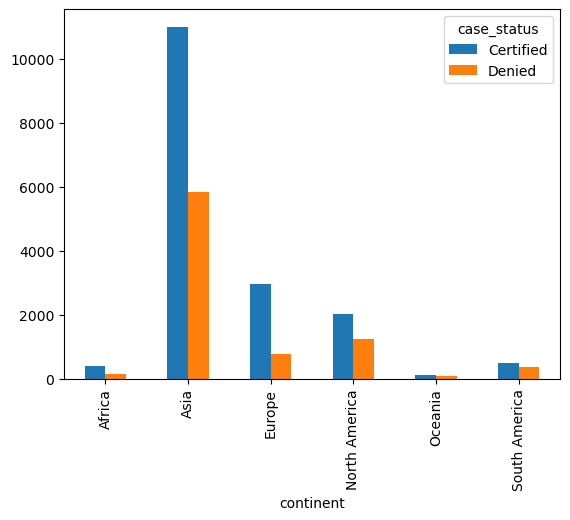

In [14]:
op.plot(kind='bar')

In [14]:
o1=[vdf['continent'],vdf['region_of_employment']]
o2=vdf['case_status']
pd.crosstab(o1,o2)

case_status                         Certified  Denied
continent     region_of_employment                   
Africa        Island                        3       5
              Midwest                      70      22
              Northeast                   155      57
              South                        78      24
              West                         91      46
Asia          Island                      136      90
              Midwest                    2524     847
              Northeast                  2790    1799
              South                      3329    1476
              West                       2233    1637
Europe        Island                       23       9
              Midwest                     249      54
              Northeast                   757     208
              South                       765     208
              West                       1163     296
North America Island                       53      29
              Midwest                     305      87
              Northeast                   653     461
              South                       565     305
              West                        461     373
Oceania       Island                        1       3
              Midwest                      30       8
              Northeast                    29      20
              South                        29      15
              West                         33      24
South America Island                       10      13
              Midwest                      75      36
              Northeast                   142     124
              South                       147      76
              West                        119     110

<Axes: xlabel='continent'>

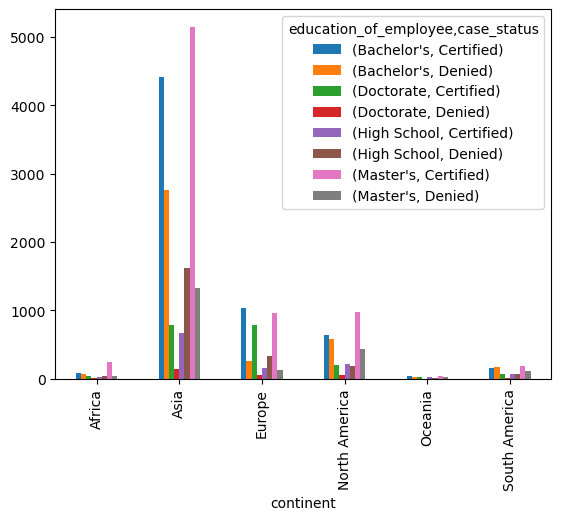

In [17]:
o1=vdf['continent']
o2=vdf['education_of_employee']
o3=vdf['case_status']
op=pd.crosstab(o1,[o2,o3])
op.plot(kind='bar')

# 08-03-2024

# NUMERICAL VS NUMERICAL

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
visa_df=pd.read_csv('Visadataset - Visadataset.csv')
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


- checking the relation blw two numerical varables

In [19]:
l1=[1,2,3,4,5]
l2=[1,2,3,4,5]
# how we get points are (1,1),(2,2),(3,3),(4,4),(5,5)

# SCATTER PLOT (CO-VARIANCE)

- scatter plt is used to plot the points between two numperical values
- syntax is just
- plt.scatter(l1,l2)

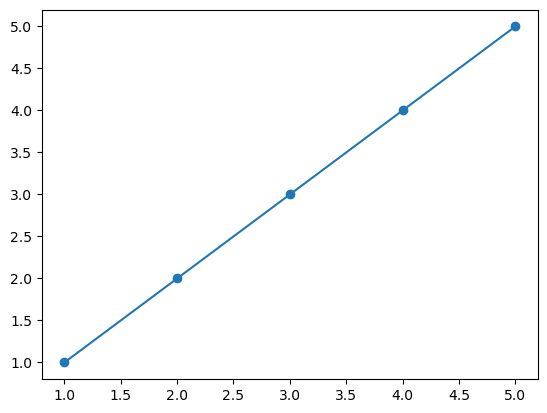

In [21]:
plt.scatter(l1,l2)
# To join them we use
plt.plot(l1,l2)
plt.show()

In [ ]:
# DRAW A PARABLA

In [45]:
x=[x for x in range(-5,6)]

In [46]:
y=[i*i for i in x]
x,y

([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5], [25, 16, 9, 4, 1, 0, 1, 4, 9, 16, 25])

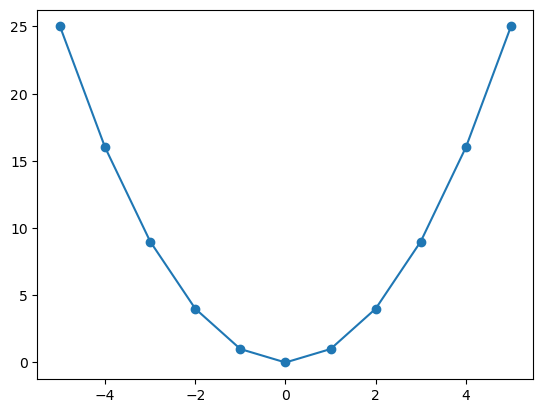

In [48]:
plt.scatter(x,y)
plt.plot(x,y)

In [54]:
# lets extract only numerical colums numerical columns

In [58]:
dty=visa_df.select_dtypes(exclude=object)
dty.columns

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

- now

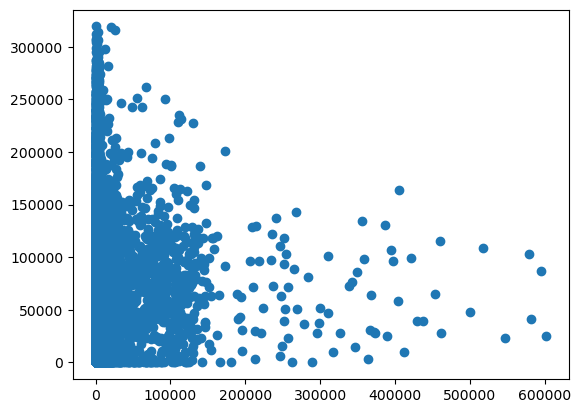

In [62]:
s1=visa_df['no_of_employees']
s2=visa_df['prevailing_wage']
plt.scatter(s1,s2)
plt.show()# NO RELATION

- here by seeing we can only say is thier any relation between them or not
- so we can achive how much relation b/w them is by persons corelation coefficien

# PERSON CORELATION COEFFICINET

- IT IS DENOTED BY 'r'
- R VARIES FORM -1 TO 1
- -1 TO 0 NEGATIVE RELATION
- 0 TO 1 POSTIVE RELATION
- 0 NO RELATION

 <img class="XqHOTb IGEbUc" alt="r =\frac{\sum\left(x_{i}-\bar{x}\right)\left(y_{i}-\bar{y}\right)}{\sqrt{\sum\left(x_{i}-\bar{x}\right)^{2} \sum\left(y_{i}-\bar{y}\right)^{2}}}" src="https://www.gstatic.com/education/formulas2/553212783/en/correlation_coefficient_formula.svg" role="img" data-csiid="24" data-atf="1">

- when we do this with python
- it gives matrix
- just visa_df.corr()
- here in visadata set we have 3 numerical columns 
- here we get 3*3=9 matrix 
- which directly says about the relation between the varables

In [ ]:
# CORR()====CORELATION METHOD

In [25]:
visa_df.corr(numeric_only=True)
#inside we should pass numerical only ==True because 
# corelation works only for numerical columns

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


**NOTE:**ALWAYS VARABLE WITH ITSELF IS ==== 1

In [65]:
# now lats draw scatter plot for this data

**NOTE:** if relation b/w no_of_employees and yr_of_estab is ===-0.017770 them  yr_of_estab relation b/w no_of_employees is same===-0.0177 etc

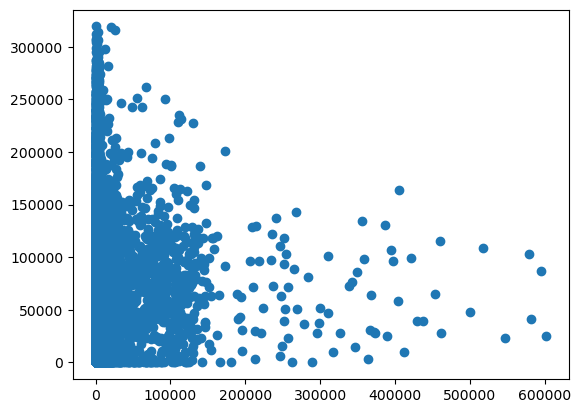

In [27]:
s3=visa_df['no_of_employees']
s4=visa_df['prevailing_wage']
plt.scatter(s3,s4)# no relation

In [ ]:
# now to see posive relation or negative relation we need 
# a data se that has more numerical columns

- WINE DATASET

In [67]:
#readdata

In [28]:
path=r"C:\Users\kragh\Data Files\winequality_red - winequality_red.csv"

In [29]:
wine_df=pd.read_csv('w')

FileNotFoundError: [Errno 2] No such file or directory: 'w'

In [72]:
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3193,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0
3194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3195,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0
3196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
wine_df.select_dtypes(exclude=object).columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [75]:
wine_df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


- form above data we can see that fixedacidity and density have highest postive relation among all others that is 0.6680....
- and Ph and fixedacidity have negative relation of -68229

# LETS DRAW A SCATTER PLOT

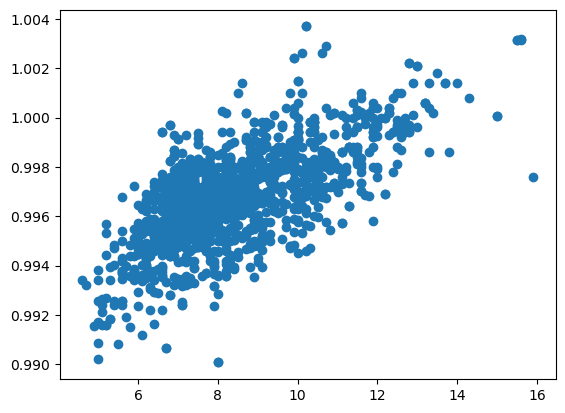

In [80]:
#postive relation
d1=wine_df['fixed acidity']
d2=wine_df['density']
plt.scatter(d1,d2)
plt.show()
# PLOT IS INCREASING

In [ ]:
#negative relation

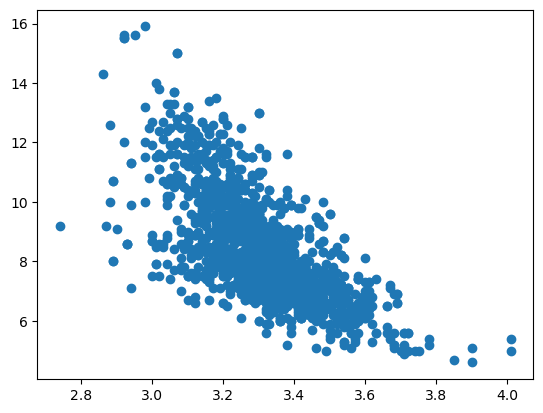

In [81]:
d3=wine_df['pH']
d4=wine_df['fixed acidity']
plt.scatter(d3,d4)
# PLOT IS DECREASING

# HEAT MAP

- HEAT MAP IS USED FOR REPRESENTATION OF MATRIX
- IT IS AVALIABLE IN SEABORN PACKAGE 
- THIS IS USED TO EASILY IDENTIFY THE RELATION B/W THE COLUMN VALUES WITH COLORS

In [84]:
corr=visa_df.corr(numeric_only=True)
corr

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


<Axes: >

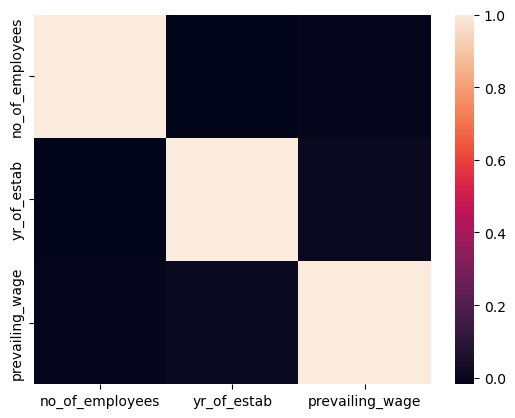

In [85]:
#heatmap
sns.heatmap(corr)

In [ ]:
# to get values inside we use thiss...annot=True

<Axes: >

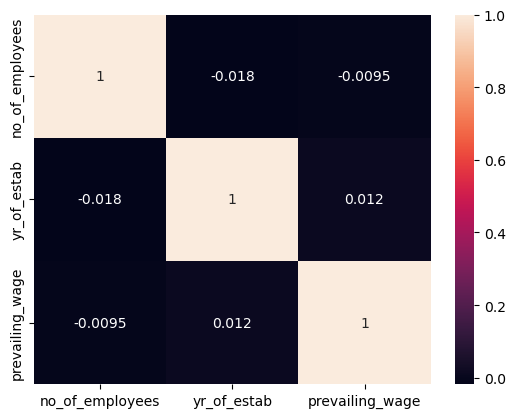

In [87]:
sns.heatmap(corr,annot=True)

**NOTE:**Here side scale varies accoring to the values 

In [88]:
# now lets take wine dataset

In [90]:
corr2=wine_df.corr()
corr2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<Axes: >

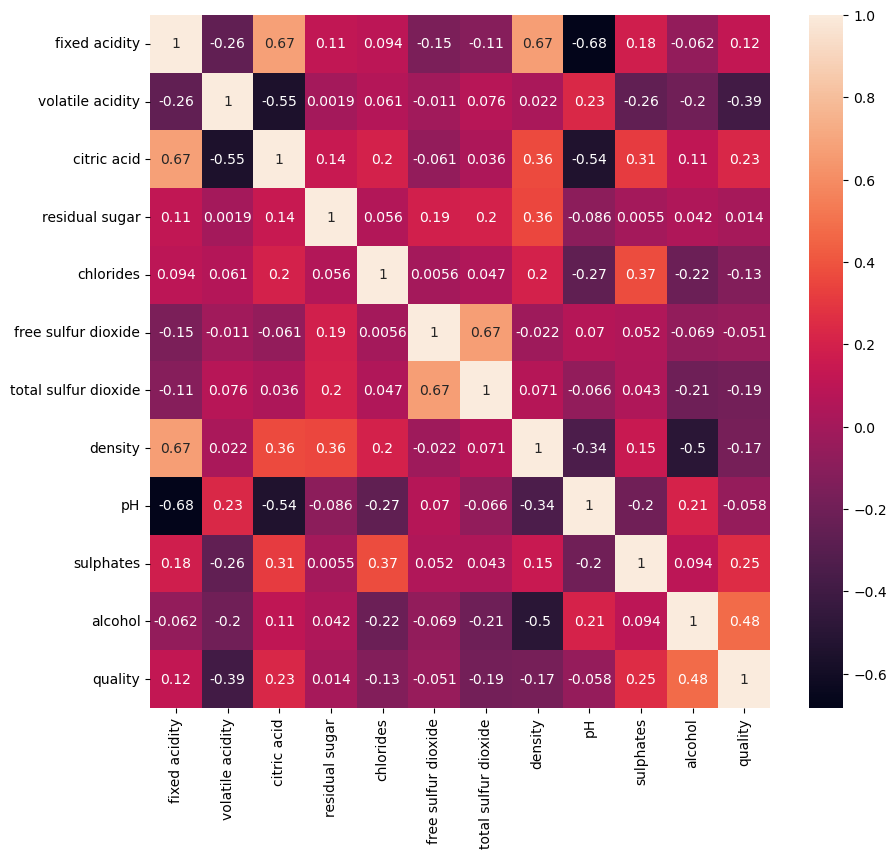

In [94]:
plt.figure(figsize=(10,9))
sns.heatmap(corr2,annot=True)

# BY USING HEAT MAP WE CAN EASILY IDENTIFY THE HIGHEST RELATION AND LOWEST RELATION BETWEEN THEM